<a id='TODO'><a\>

TODO: 5
- Add links to files with all lists of langauges
- Add link for download of all models and everything. 
- Change all trainings to return only one object and atleast not return both cov2 and pca2
- Add udhr/wiki/string as source for header of multiple language plots
- Add scatter of the same text multple times to plot variance
- scroll over parameters

[back to top](#top)

<center><h1> The Essence of Language - Final Report </center><h1>

#### A demonstration and exploration by Noam Kaplan. 
- Email:    Noam.Kaplan85@gmail.com
- Linkedin: https://il.linkedin.com/in/noam-kaplan-22b46683

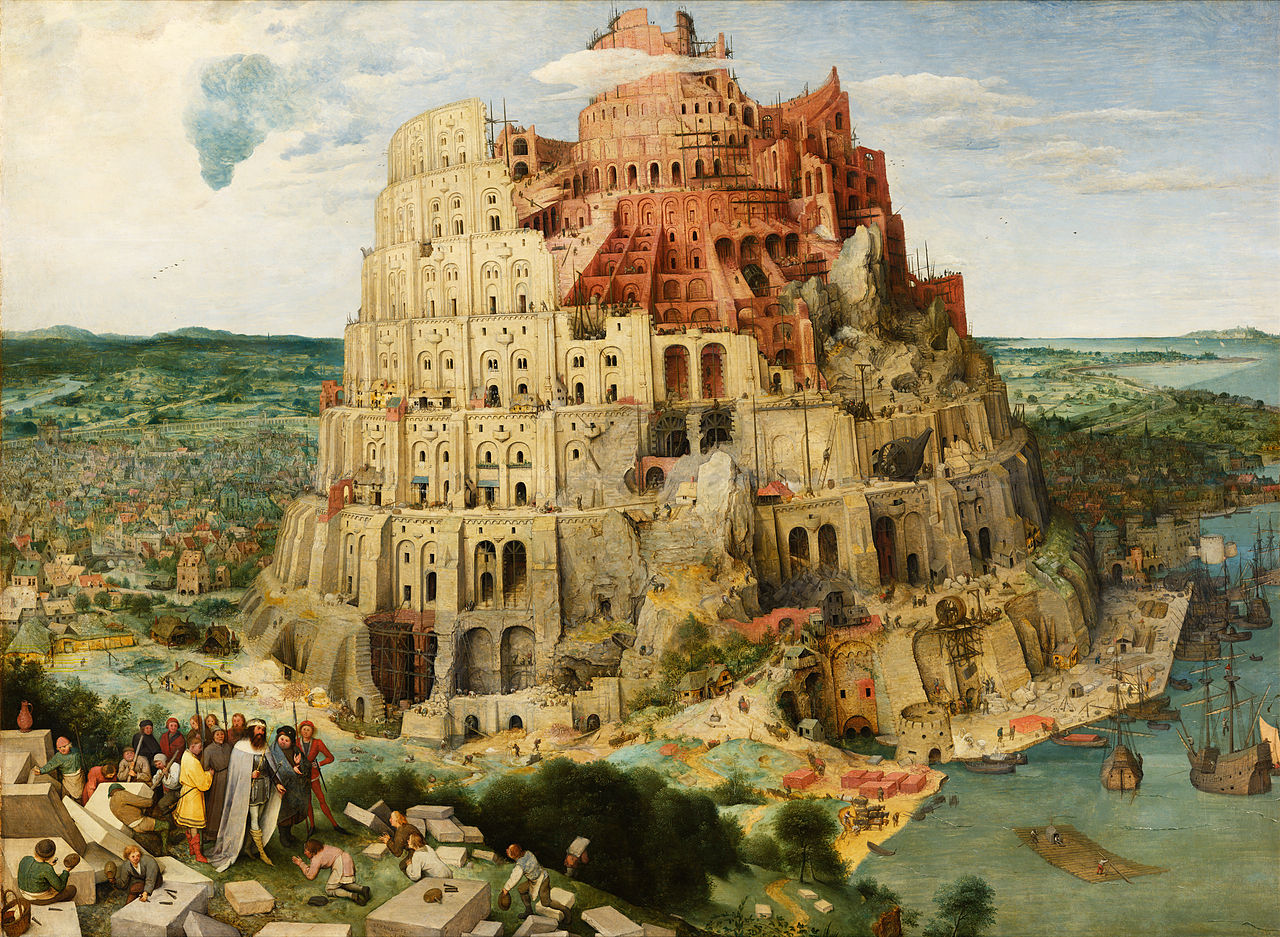

In [1]:
import os
os.chdir('/home/noamk/Dropbox/pythonWorkspase/unispeak')
from IPython.display import Image
Image(filename='Pieter_Bruegel_Babel_(Vienna).jpg', height=150, width=150)

In [2]:
from Unispeak_research_functions import *
%matplotlib inline

In [3]:
from bokeh.resources import INLINE

output_notebook(resources=INLINE)
#output_notebook()


Loading BokehJS ...

<a id="top"></a>

### Table of contents: 

- [TODO](#TODO)

- [Introduction: ](#Intro)
- [ 1. Review of textual resources](#1.)
    - [ 1.1 Universal Declaration of Human Rights (UDHR)](#1.1.)
    - [ 1.2. Multilingual Wikipedia Corpus](#1.2.)
    - [ 1.3. Gutenburg Project](#1.3)
- [2. Language Modeling and Feature Extraction ](#2.) 
    - [2.1. Model Requirements:  ](#2.1.)
    - [2.2. Modeling Languages using Word2vec ](#2.2.)
        - [2.2.1. About Word2vec ](#2.2.1.)
        - [2.2.2. What does the word2vec capture? ](#2.2.2.)
        - [2.2.3. Limitations and Drawbacas](#2.2.3.)
    - [2.3. Train or read models from file ](#2.3.)
        - [2.3.1. Create or read language lists ](#2.3.1.)
        - [2.3.2. Read or train models ](#2.3.2.)
- [3. Visualizing multiple Languages ](#3.) 
    - [3.1. Multiple Language Explained Variance Ration Scatter](#3.1.)
        - [3.1.1. UDHR explained variance ratio scatter ](#3.1.1.)
        - [3.1.2. Wikipedia explained variance ratio scatter ](#3.1.2.)
- [4.  Visualizing a Single Language](#4.)
  - [4.1. Visualizing a single language: Hebrew](#4.1.)
  - [4.2. Visualizing a single language: English](#4.1.2.)
  - [4.3. Visualizing a single language: Sanskrit](#4.1.3.)
  - [4.1.4. Visualizing a single language: Spanish](#4.1.4.) 
- [5.  Conclusion](#5.)
  - [5.1. ](#5.1.)
- [Appendix](#Appendix)
- [Code Examples to remove](#Code examples to remove)
- [Bottom of notebook](#bottom)

<a id='Intro'></a>

## Introduction: 

[[back to top](#top)]

For those of us who have not read the previous reports, some information: 
- Detailed explantion of what the project is about. ( A new way of studying and thinking of languages. )
- Explain how the project molded on the go. 
- Innovative contributions: 
    - A new way of thinking about languages and linguistics. 
    - A basic yet intuitive set of powerful visualizations. 
    - A multilingual corpus.
    - New dataset: An extensive set of multiple thoroughly collected Word2vec model. 
- Links to previous reports. 
- Who was involoved. 
- Under what circumstances was the study conducted (fourth year final eng. proj)
- Explain that it is far from complete

preface: Since this is not just a scientific publication but first and foremost a graded assignment, It is necessary to follow the required protocol. This report must chronicle all of the work done on the project. For good and for bad, a window has been opened into the process of the work we have done. Though our work is described stage by stage (usually in chronological order but not at the price of distrupting the sometimes not sequential the story[Some times the sequential order by which a story evolves does not follow the chronological time line. ]) but is easily navigate and bounce between segments using "back to top" and the contents.  

some explantion on the foramt: Juypter (formally ipython) is a complete inviorment for python, running from browser. When viewing the notebook in nbviewer (TODO: ADD) the notebook is inert yet still interactive. Code can still be viewed as code (colour and errors) and the output of each cell is available. 

One of the advantages of this format is that unlike the orthodox report, this document can serve in many ways as a tutorial or guide. 

<a id='1.'></a>

## 1. Review of textual resources

[back to top](#top)

Without understanding the underlying data, our results cannot be properly understood. In light of our abstract goals, results cannot be easily assesed or cross validated. In this section we will present our collected data in detail  consider the subtle nuances characterizing texts from different sources. 

A complete and thorough discussion of the topic is available in the progress report. TODO: add link. 


<a id='1.1.'></a>

### 1.1. Universal Declaration of Human Rights (UDHR)

[Back to top](#top)

The Universal Declaration of Human Rights (UDHR) is a declaration adopted by the United Nations General Assembly on 10 December 1948 at the Palais de Chaillot, Paris. The Declaration arose directly from the experience of the Second World War and represents the first global expression of what many people believe to be the rights to which all human beings are inherently entitled. TODO: add link to wiki https://en.wikipedia.org/wiki/Universal_Declaration_of_Human_Rights

The UDHR is a short and accesible multilingual source available in 310 different languages, accesible through NLTK. It allowd a quick fisibilty check and a fertile ground for creating our first visualizations. Though interperting the results is tempting, it is doubtful that a document of this length can contain enough information to properly characterize languages. 

In accordance with our randomized approach, the following examples of documents in different languages are chosen randomly each time the cell is run.  TODO: Mention randomized approach

Some general statistics of all languages:

In [12]:
verbose = True
n=10
language_names = get_languages_names(n, verbose=True)
words2print = random.randint(10,50)
for i in list(range(0,n)):
    text = nltk.corpus.udhr.words(language_names[i])
    if verbose:
        print('\n', 'Language: ', language_names[i],'\n','Words: ', text[:words2print], '\n')        

Names of 10 first languages, out of 310 different languages.

 Language:  Bichelamar-Latin1 
 Words:  ['Deklereisen', 'Blong', 'Raet', 'Blong', 'Evri', 'Man', 'Mo', 'Woman', 'Raon', 'Wol', 'FESTOK', 'From', 'se', 'Jenerol', 'Asembli', 'i', 'luksave', 'respek'] 


 Language:  Otomi_Nahnu-Latin1 
 Words:  ['XO', 'MAA', 'NU', 'XIJMOJOI', 'NU', 'KUCHTI', 'KJA', "'", 'NI', 'XO', 'MAA', 'Nu', 'ro', 'ndejte', 'ka', 'ro', 'jiegi', 'nu'] 


 Language:  Frisian-Latin1 
 Words:  ['Universele', 'ferklearring', 'fan', 'de', 'rjochten', 'fan', 'de', 'minske', 'Universele', 'ferklearring', 'fan', 'de', 'rjochten', 'fan', 'de', 'minske', ',', 'proklamearre'] 


 Language:  Yoruba-UTF8 
 Words:  ['ÌKÉDE', 'KÁRÍAYÉ', 'FÚN', 'È', '̟', 'TÓ', '̟', 'O', '̟', 'MO', '̟', 'NÌYÀN', 'Ò', '̟', 'RÒ', '̟', 'ÀKÓ', '̟'] 


 Language:  Portuguese_Portugues-Latin1 
 Words:  ['Declaração', 'Universal', 'dos', 'Direitos', 'Humanos', 'Preâmbulo', 'Considerando', 'que', 'o', 'reconhecimento', 'da', 'dignidade', 'inerente',

Observing a simple feature such as the distribution of the number of words for different lanuages or the number of different words (set) demonstrates how different the representation of the same content can be. As clearly seen below, even in a short document as the UDHR, many differences are visible between lanuages. 

In [5]:
num_words = [len(nltk.corpus.udhr.words(lang)) for lang in nltk.corpus.udhr.fileids()]
hist1 = Histogram(num_words, title="Number of Words in UDHR", background_fill_color="#E8DDCB", )
hist1.xaxis.axis_label = 'Number of words'
hist1.yaxis.axis_label = 'Languages'

num_diff_words = [len(set(nltk.corpus.udhr.words(lang))) for lang in nltk.corpus.udhr.fileids()]
hist2 = Histogram(num_diff_words, title="Number of Different Words in UDHR", background_fill_color="#E8DDCB", )
hist2.xaxis.axis_label = 'Number of Different Words'
hist2.yaxis.axis_label = 'Number of Languages'

show(gridplot(hist1, hist2, ncols=2, plot_width=400, plot_height=300, toolbar_location=None))

<a id='1.2.'></a>

### 1.2. Multilingual Wikipedia Corpus

[Back to top](#top)

Wikipedia is a universal paramount source of information in almost every domain. The word universal is used in this context in order to emphasize one of Wikipedia’s most remarkable attributes - serving a fountain of knowledge for most people in the world - regardless of their native tongue. Featuring 40,742,921 different articles in 283 different languages, Wikipedia is indeed an unprecedented free source of multilingual texts.

A large corpus mined from such a source is suitable for facilitating a proper process of research and the inference of concrete conclusions. Mining Wikipedia was a long and complicated endeavor that has not yet been completed to it's full extent. Even before it's completion it is easily the most time consuming part of the research. Since the possible beneficiary of this study is humanity, all our collected data will be made available, hopefuly used for a similar purpose as well.  

A complete discussion of the different aspects of this corpus is available in the progress report. 

- The process of collecting was explaind at length a chapeter TODO

In [6]:
# Load saved corpus: 
wc = wikipedia_reader(load_path='/home/noamk/Dropbox/pythonWorkspase/unispeak/Corpuses/wiki_pickels/Main/')

Number of languages in corpus:  283
Number of terms in corpus:  51


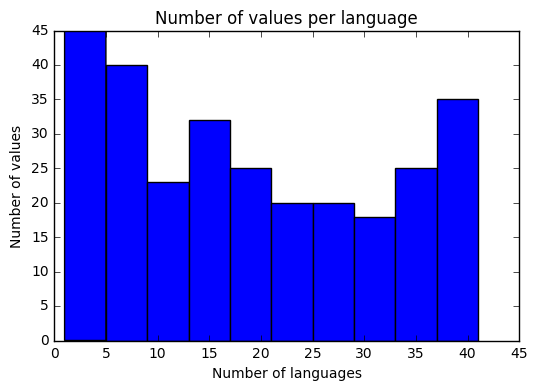

In [7]:
print('Number of languages in corpus: ', len(wc.get_languages()))
print('Number of terms in corpus: ', len(wc.get_terms()))
wc.stats_num_values_hist()

TODO: REemove 'Gilaki' from language list

In [8]:
[len(sents_words_wiki(lang)) for lang in wc.get_languages() if lang != 'Gilaki']

In train_punkt_tokenizer, language:  Cree
In train_punkt_tokenizer, language:  Kikuyu
In train_punkt_tokenizer, language:  Bishnupriya
In train_punkt_tokenizer, language:  Maltese
In train_punkt_tokenizer, language:  Novial
In train_punkt_tokenizer, language:  Picard
In train_punkt_tokenizer, language:  Swati
In train_punkt_tokenizer, language:  Kalmyk
In train_punkt_tokenizer, language:  Rundi
In train_punkt_tokenizer, language:  Sranan Tongo
In train_punkt_tokenizer, language:  Hausa
In train_punkt_tokenizer, language:  Akan
In train_punkt_tokenizer, language:  Bikol Central
In train_punkt_tokenizer, language:  Corsican
In train_punkt_tokenizer, language:  Hakka Chinese
In train_punkt_tokenizer, language:  Tswana
In train_punkt_tokenizer, language:  Sango
In train_punkt_tokenizer, language:  Aymara
In train_punkt_tokenizer, language:  Tongan
In train_punkt_tokenizer, language:  Maithili
In train_punkt_tokenizer, language:  Inuktitut
In train_punkt_tokenizer, language:  Fulah
In train

KeyboardInterrupt: 

<a id='1.3.'></a>

### 1.3. Gutenburg Project

[Back to top](#top)

Project Gutenberg (PG) is a volunteer effort to digitize and archive cultural works, to "encourage the creation and distribution of eBooks".[3] It was founded in 1971 by Michael S. Hart and is the oldest digital library.[4] Most of the items in its collection are the full texts of public domain books. The project tries to make these as free as possible, in long-lasting, open formats that can be used on almost any computer. As of 3 October 2015, Project Gutenberg reached 50,000 items in its collection. TODO: Add link to wiki: https://en.wikipedia.org/wiki/Project_Gutenberg

A seemingly irrelevant corpus with litriture mostly in a single language. It's exact purpose is explained in detail in chapter TODO. This corpus became relevant due to our need for a controlled experiment allowing measuring the effect different parameters, both model dependant (ie. window size, vector dim) and corpus dependant (ie. Number and lengeth of articles, vocab size)

TODO: add stats

<a id='2.'></a>

## 2. Language Modeling and Feature Extraction: 

[[back to top](#top)]

This chapter will consider the problems and complexity of modeling languages without human intervention or understanding. 

The matter at hand is not simple and has no correct answer. Currently languages are modeled using w2v models. There are a multitude of aspects worth regarding any chosen model. Since advantages and disadvantages exist in any model, it is likely the most well fitted language model will be a combination of multiple languages - an **Ensemble**. 

some different language models: 
Factored language model
Cache language model
Katz's back-off model


<a id='2.1.'></a>

### 2.1. Model Requirements: 

[back to top](#top)

Before considering the quality and benifits of different models, some basic guidelines must be drawn. Research relying on a language model that does not fulfil these requirements can yield no fruit, regardless of how well the model captures the texts. 

- Unsupervised: First and foremost, models must stick to our fundamental pardigm - No human intervention. Models must be unsupervised and independent of any language specific assumptions. 
- Comparability: Specific language models are incomplete on their own, when not compared to other languages. Models must allow comparing different languages in order to facilitate a better understanding of the phenomenon of language itself. 
- Visualiztion: The expected complexity of any model describing a language or a text exeeds the computational resources of the human mind by far. Models must allow visualiztion of important features, otherwise not benefit can be drawn from studying languages we do not understand. 



<a id='2.2.'></a>

### 2.2. Modeling Languages with Word2vec: 

[back to top](#top)

<a id='2.2.1.'></a>

#### 2.2.1. About Word2vec: 

[back to top](#top)

Word2vec is a group of related models that are used to produce word embeddings. These models are shallow, two-layer neural networks that are trained to reconstruct linguistic contexts of words. Word2vec takes as its input a large corpus of text and produces a high-dimensional space (typically of several hundred dimensions), with each unique word in the corpus being assigned a corresponding vector in the space. Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located in close proximity to one another in the space. TODO: Add footnote to wikipedia: https://en.wikipedia.org/wiki/Word2vec

word2vec
Backgrouned, How does in work, what is the output?  

<a id='2.2.2.'></a>

#### 2.2.2. What does the word2vec capture?

[back to top](#top)

As proof fot the algorithms effectivity, some examples are due. 

The classic example usually used to explain the algorithm is the following: 
Start with some good examples: afganistan-violence=jordan, Human-ethics=animal. Add syntactical example. Explain that these are all neat examples that prove how deep the "understanding of w2v model is, or, how well the model captures and represents the texts it was trained on. 

We are counting on the models capturing much deeper elements of langauge, elements we cannot hope to prove with queries like before because of their supervised nature. 

In [9]:
Image(filename='word2vec-gender-relation_converted.jpg', height=150, width=150)

In [10]:
Image(filename='Images/word2vec-plural-relation.png', height=150, width=150)


<a id='2.2.3.'></a>

#### 2.2.3. Limitations and Drawbacas: 

[back to top](#top)

1) sensitivity to parameters (we "play" with 2) and the lack of parameter tunning. 
2) Sensitivity to corpus length
3) Need to train models on same params while each corpus should be represented differently. 

<a id='2.3.'></a>

### 2.3. Train or read models from file 

[back to top](#top)

TODO: Add part about how model was trained with code explanations. 

<a id='2.3.1.'></a>

#### 2.3.1. Create or read language lists

[back to top](#top)

##### UDHR: 
- TODO: add that languages were compiled into different lists manually in a supervised manner so we can check our expectations. 

In [4]:
# TODO: change to reading lists from file
language_names = nltk.corpus.udhr.fileids()
udhrLangGroup_1 = ['Arabic_Alarabia-Arabic', 'Spanish_Espanol-Latin1', 'Dutch_Nederlands-Latin1', 'Punjabi_Panjabi-UTF8',
                         'Latin_Latina-Latin1', 'Finnish_Suomi-Latin1', 'Vietnamese-ALRN-UTF8', 'Estonian_Eesti-Latin1',
                         'Belorus_Belaruski-UTF8', 'Uighur_Uyghur-UTF8', 'Mongolian_Khalkha-Cyrillic', 'Ido-Latin1',
                         'Serbian_Srpski-Cyrillic', 'Russian-UTF8', 'Interlingua-Latin1', 'Farsi_Persian-UTF8', 'Esperanto-UTF8',
                         'Ukrainian-Cyrillic', 'Korean_Hankuko-UTF8', 'Faroese-Latin1', 'Welsh_Cymraeg-Latin1',
                         'Indonesian-Latin1', 'Czech_Cesky-Latin2', 'Serbian_Srpski-UTF8', 'Portuguese_Portugues-Latin1',
                         'Hebrew_Ivrit-Hebrew','Maori-Latin1', 'Slovenian_Slovenscina-Latin2', 'Swedish_Svenska-Latin1',
                         'Icelandic_Yslenska-Latin1', 'English-Latin1', 'Edo-Latin1', 'Hindi-UTF8', 'Turkish_Turkce-Turkish', 
                         'Sanskrit-UTF8', 'Italian-Latin1', 'Norwegian_Norsk-Nynorsk-Latin1', 'Nepali-UTF8','German_Deutsch-Latin1', 
                         'French_Francais-Latin1', 'Chinese_Mandarin-GB2312']

udhrLangGroup_2 = ['Arabic_Alarabia-Arabic', 'Spanish_Espanol-Latin1', 'Dutch_Nederlands-Latin1', 'Punjabi_Panjabi-UTF8',
                         'Latin_Latina-Latin1', 'Finnish_Suomi-Latin1', 'Vietnamese-ALRN-UTF8', 'Estonian_Eesti-Latin1',
                         'Belorus_Belaruski-UTF8', 'Uighur_Uyghur-UTF8', 'Mongolian_Khalkha-Cyrillic', 'Ido-Latin1',
                         'Serbian_Srpski-Cyrillic', 'Russian-UTF8', 'Interlingua-Latin1', 'Farsi_Persian-UTF8', 'Esperanto-UTF8',
                         'Ukrainian-Cyrillic', 'Hindi_web-UTF8', 'Korean_Hankuko-UTF8', 'Faroese-Latin1', 'Welsh_Cymraeg-Latin1',
                         'Indonesian-Latin1', 'Czech_Cesky-Latin2', 'Serbian_Srpski-UTF8', 'Portuguese_Portugues-Latin1',
                         'Hebrew_Ivrit-Hebrew', 'English-Latin1',]

udhrLangGroup_3 = ['English-Latin1', 'French_Francais-Latin1', 'Arabic_Alarabia-Arabic', 'Spanish_Espanol-Latin1',
                             'Dutch_Nederlands-Latin1', 'Belorus_Belaruski-UTF8', 'German_Deutsch-Latin1', 'Hebrew_Ivrit-Hebrew',
                             'Latin_Latina-Latin1', 'Czech_Cesky-Latin2', 'Serbian_Srpski-UTF8', 'Portuguese_Portugues-Latin1', 
                             'Sanskrit-UTF8',]

udhrLangGroup_4 = [lang for lang in language_names if 'Latin' in lang] # 205 languages

##### Corpus: Wikipedia

In [5]:
# Load saved corpus: 
wc = wikipedia_reader(load_path='/home/noamk/Dropbox/pythonWorkspase/unispeak/Corpuses/wiki_pickels/Main/')

lan_wiki_short = ['Afrikaans', 'Arabic', 'Portuguese']
lan_wiki1 = ['Cantonese', 'Quecha', 'Japanese', 'Waray', 'Malayalam', 'Chinese (Min Nan)', 'Haitian Creole', 
             'Sicilian', 'Welsh', 'Interlingua', 'German', 'Portuguese', 'Turkish', 'Alemannisch', 'Icelandic',
             'Burmese', 'Persian', 'French', 'Finnish', 'Urdu', 'Scottish Gaelic', 'Spanish', 'Armenian', 
             'Javanese', 'Yiddish', 'Hindi', 'Korean', 'Hebrew', 'Malay', 'Esperanto', 'Punjabi', 'Mongolian',
             'Kurdish', 'Sundanese', 'Indonesian', 'Afrikaans', 'Arabic', 'Portuguese']

In [6]:
# Choose languages: 
lan_wiki1 = wc.get_langs_x_vals(15) + ['Sanskrit', 'Yiddish']
for del_lang in ['Classical Chinese', 'Gan Chinese']:
    for i, lang in enumerate(lan_wiki1):
        if lang==del_lang:
            del lan_wiki1[i]

lan_wiki2 = ['Cantonese', 'Quecha', 'Japanese', 'Waray', 'Malayalam', 'Chinese (Min Nan)', 'Haitian Creole', 
             'Sicilian', 'Welsh', 'Interlingua', 'German', 'Portuguese', 'Turkish', 'Alemannisch', 'Icelandic',
             'Burmese', 'Persian', 'French', 'Finnish', 'Urdu', 'Scottish Gaelic', 'Spanish', 'Armenian', 
             'Javanese', 'Yiddish', 'Hindi', 'Korean', 'Hebrew', 'Malay', 'Esperanto', 'Punjabi', 'Mongolian',
             'Kurdish', 'Sundanese', 'Indonesian', 'Afrikaans', 'Arabic', 'Portuguese', 'Sanskrit', 'Yiddish']
lan_wiki3 = ['Japanese', 'Chinese (Min Nan)', 'Interlingua', 'German', 'Turkish', 'Persian', 'French', 'Finnish',
             'Urdu', 'Spanish', 'Yiddish', 'Hindi', 'Korean', 'Hebrew', 'Esperanto', 'Punjabi',  'Afrikaans',
             'Arabic', 'Portuguese']

<a id='2.3.2.'></a>

#### 2.3.2. Read or train models

[back to top](#top)

##### Train models on UDHR

In [7]:
ud1_models, ud1_lang2pca, ud1_lang2pca3, ud1_cov2pca, ud1_cov2pca3, ud1_covariance = udhr2models(udhrLangGroup_1, window=5, size=16, verbose=False)

##### Train models on Wikipedia corpus

In [14]:
wik1_models, wik1_lang2pca, wik1_lang2pca3, wik1_cov2pca, wik1_cov2pca3, wik1_covariance = udhr2models(lan_wiki1, wiki_corpus=wc, verbose=False)

In [ ]:
wik2_models, wik2_lang2pca, wik2_lang2pca3, wik2_cov2pca, wik2_cov2pca3, wik2_covariance = udhr2models(lan_wiki2, wiki_corpus=wc, verbose=False)

<a id='3.'></a>

## 3. Visualizing multiple Languages: 

[[back to top](#top)]

TODO: Add introduction about Plotting pca explained ratio. 

<a id='3.1.'></a>

### 3.1. Multiple Language Explained Variance Ratio Scatter 

[[back to top](#top)]

<a id='3.1.1.'></a>

### 3.1.1. UDHR explained variance ratio scatter. 

[back to top](#top)

TODO_DANI: Constructed languages in different color

In [8]:
#output_notebook()

Loading BokehJS ...

In [9]:
p = plot_2d_pca_bokeh(ud1_cov2pca, return_p=True)


In [10]:
p

In [11]:
show(p)

In [ ]:
output_notebook()
plot_2d_pca_bokeh(ud2_cov2pca)

In [ ]:
output_notebook(resources=INLINE)
plot_2d_pca_bokeh(ud2_cov2pca)

In [12]:
#plot_2d_pca_bokeh(ud4_cov2pca)

<a id='3.1.2.'></a>

### 3.1.2. Wikipedia explained variance ratio scatter. 

[[back to top](#top)]

In [ ]:
Explained variance ratio in to dims
What is the maximum explained variance ratio

In [15]:
plot_2d_pca_bokeh(wik1_cov2pca)

In [ ]:
plot_2d_pca_bokeh(wik2_cov2pca)

<a id='4.'></a>

## 4. Visualizing a Single Language. 

[[back to top](#top)]

<a id='4.1.'></a>

### 4.1. Visualizing a single language: Hebrew

[[back to top](#top)]

Read Wikipedia Corpus: [2.3.1. Create or read language lists](#2.3.1.)

In [16]:
languages = lan_wiki3
languages = ['Hebrew', 'Sanskrit', 'Simple English']
models_dict=create_models_dict_final([( language, 'wiki') for language in languages], size=36, window=5,
                               wiki_corpus=wc, return_dict=True)#text_dict, verbose=False)    

In [18]:
single_lang_vis_select(languages, models_dict, )

<a id='5.'></a>

## 5. Conclusion 

[[back to top](#top)]

- Contribution: Wikicorpus, Visualiztions, w2vmodels

<a id='5.1'></a>

### 5.1. 

[[back to top](#top)]

<a id='Appendix'></a>

## Appendix

[[back to top](#top)]

Great tutorials: 
 - 1) Using word2vec, choosing parameters, ~Getting data from wikipedia!!!~:  https://codesachin.wordpress.com/2015/10/09/generating-a-word2vec-model-from-a-block-of-text-using-gensim-python/comment-page-1/#comment-422
 - 2) Dimentionality reduction: t-distributed stochastic neighbor embedding. Van der matten's FAQ included in link/  
 http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
 - 3) Tutorial with lots of links and such about w2v, lots of great data: 
http://multithreaded.stitchfix.com/blog/2015/03/11/word-is-worth-a-thousand-vectors/
 - 4) Notebook by Mikolov: http://nbviewer.jupyter.org/github/fbkarsdorp/doc2vec/blob/master/doc2vec.ipynb
 - 5) w2v visualization: https://gist.github.com/chezou/3899461aa550f73854a1#file-visword2vec-py

Refferences: 
 - 1) Interactive plot: https://plot.ly/ipython-notebooks/

Resources: 
 - Multilingual intersting courpus: http://opus.lingfil.uu.se/ (subtitels and what not, aligned!)
 - List of corpuses and nlp resources: http://www-nlp.stanford.edu/links/statnlp.html

<a id='Code examples to remove'><a\>

### Code Examples

[Back to top](#top)

Update notebook in nbviewer: add to address line - ?flush_cache=true

[back to top](#top)

<a id="bottom"><a\>

TODO: 
